In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#import h5py # Broken on current setup of raspi
import pickle

import time
import os,sys

import soundfile as sf

from scipy.signal import butter, lfilter, freqz, find_peaks

ModuleNotFoundError: No module named 'soundfile'

---

# Test 2 - 2024-05-01

In [21]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

## Raw

* Ch1 : Delrin, IP
* Ch2 : Delrin, Aluminum
* Ch3 : Bare
* Ch4 : Delrin, Aluminum

In [15]:
f_12 = './data_2024-05-01/COMPATT_ch1-ch2_1_20240502_123212.flac'
f_34 = './data_2024-05-01/COMPATT_ch3-ch4_1_20240502_123307.flac'
data_12, rate_12 = sf.read(f_12)
data_34, rate_34 = sf.read(f_34)

# make one dataset
rate = np.concatenate((np.repeat(rate_12, 2), np.repeat(rate_34, 2)))
data = np.concatenate((data_12, data_34), axis=1)

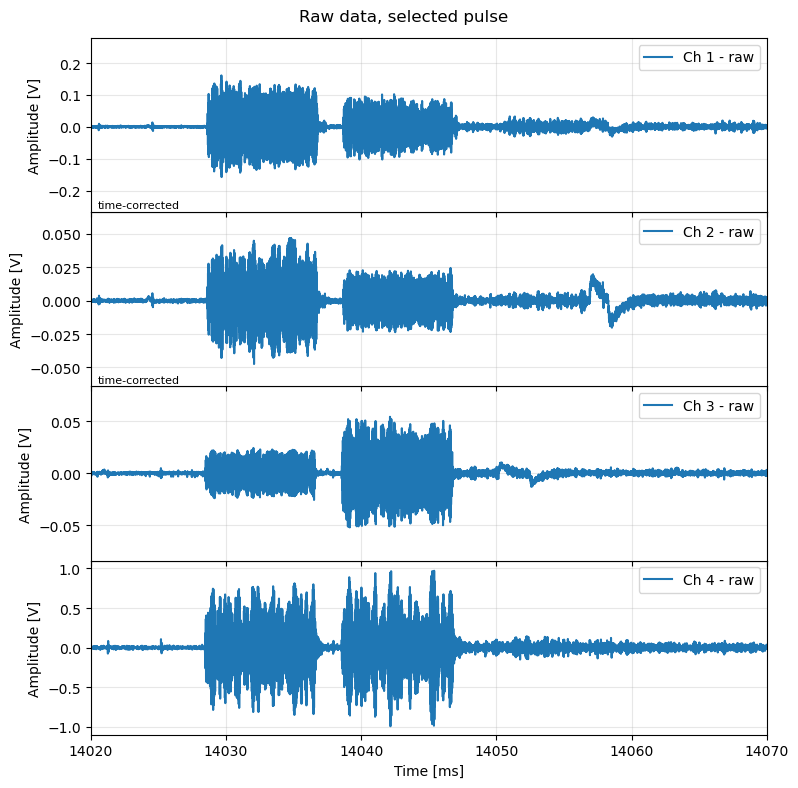

In [21]:
fig = plt.figure(figsize=(8,8))
gs = mpl.gridspec.GridSpec(4,1)
gs.update(wspace=0., hspace=0.)

ax3 = plt.subplot(gs[(3)])
ax2 = plt.subplot(gs[(2)], sharex=ax3)#, sharey=ax3)
ax1 = plt.subplot(gs[(1)], sharex=ax3)#, sharey=ax3)
ax0 = plt.subplot(gs[(0)], sharex=ax3)#, sharey=ax3)
axs = [ax0, ax1, ax2, ax3]

for i in range(4):
    ax = axs[i]
    # get time axis
    ts   = 1e3 # from sec to x
    time = np.arange(0, len(data[:,i])) / rate[i] * ts
    # synchronize data sets manually
    if i <= 1:
        time += 0.20675*ts
        ax.text(0.01, 0.01, 'time-corrected', 
                ha='left', va='bottom', fontsize=8,
                transform = ax.transAxes)
    # raw data plot
    ax.plot(time, data[:,i], label='Ch %i - raw' %(i+1))
    # formatting
    ax.set_ylabel('Amplitude [V]')
    ax.legend(loc='upper right')
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', alpha=0.3)
    ax.grid(which='minor', alpha=0.05)
    if i < 3:
        ax.tick_params(axis='x', labelbottom=False)
    
ax.set_xlim(14.02*ts, 14.07*ts)
ax.set_xlabel('Time [ms]')
fig.suptitle('Raw data, selected pulse')
plt.tight_layout()
plt.show()

## Common amplitude scale

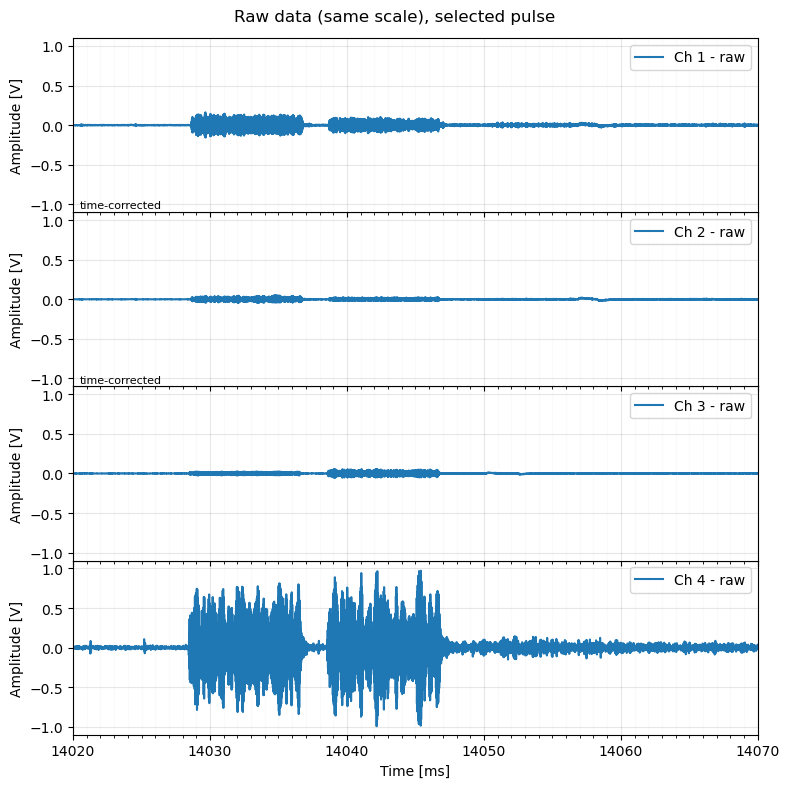

In [6]:
fig = plt.figure(figsize=(8,8))
gs = mpl.gridspec.GridSpec(4,1)
gs.update(wspace=0., hspace=0.)

ax3 = plt.subplot(gs[(3)])
ax2 = plt.subplot(gs[(2)], sharex=ax3, sharey=ax3)
ax1 = plt.subplot(gs[(1)], sharex=ax3, sharey=ax3)
ax0 = plt.subplot(gs[(0)], sharex=ax3, sharey=ax3)
axs = [ax0, ax1, ax2, ax3]

for i in range(4):
    ax = axs[i]
    # get time axis
    ts   = 1e3 # from sec to x
    time = np.arange(0, len(data[:,i])) / rate[i] * ts
    # synchronize data sets manually
    if i <= 1:
        time += 0.20675*ts
        ax.text(0.01, 0.01, 'time-corrected', 
                ha='left', va='bottom', fontsize=8,
                transform = ax.transAxes)
    # raw data plot
    ax.plot(time, data[:,i], label='Ch %i - raw' %(i+1))
    # formatting
    ax.set_ylabel('Amplitude [V]')
    ax.legend(loc='upper right')
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', alpha=0.3)
    ax.grid(which='minor', alpha=0.05)
    if i < 3:
        ax.tick_params(axis='x', labelbottom=False)
    
ax.set_xlim(14.02*ts, 14.07*ts)
ax.set_xlabel('Time [ms]')
fig.suptitle('Raw data (same scale), selected pulse')
plt.tight_layout()
plt.show()

## Noise band

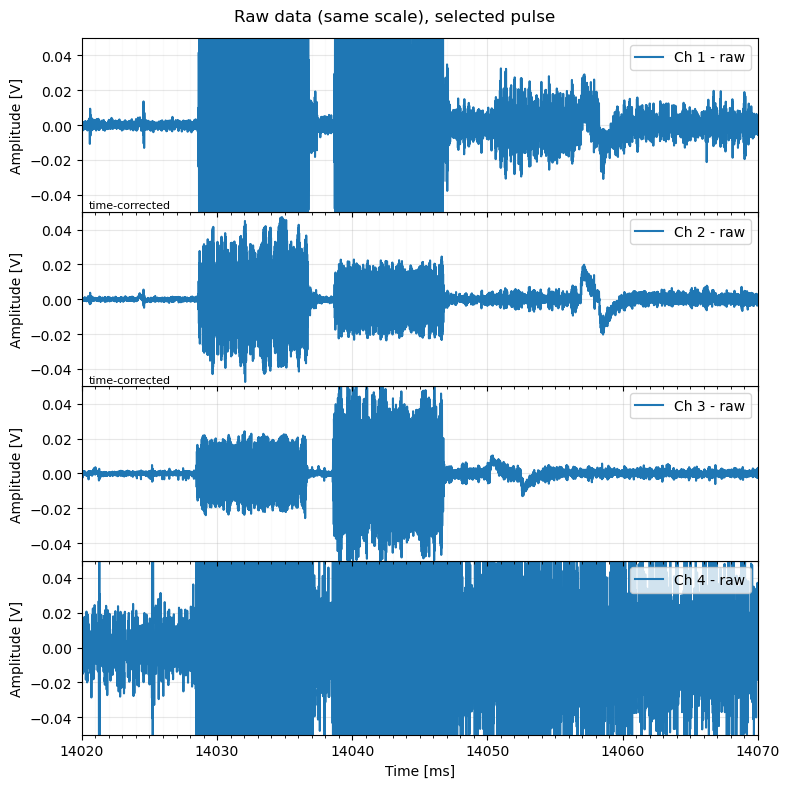

In [8]:
fig = plt.figure(figsize=(8,8))
gs = mpl.gridspec.GridSpec(4,1)
gs.update(wspace=0., hspace=0.)

ax3 = plt.subplot(gs[(3)])
ax2 = plt.subplot(gs[(2)], sharex=ax3, sharey=ax3)
ax1 = plt.subplot(gs[(1)], sharex=ax3, sharey=ax3)
ax0 = plt.subplot(gs[(0)], sharex=ax3, sharey=ax3)
axs = [ax0, ax1, ax2, ax3]

for i in range(4):
    ax = axs[i]
    # get time axis
    ts   = 1e3 # from sec to ms
    time = np.arange(0, len(data[:,i])) / rate[i] * ts
    # synchronize data sets manually
    if i <= 1:
        time += 0.20675*ts
        ax.text(0.01, 0.01, 'time-corrected', 
                ha='left', va='bottom', fontsize=8,
                transform = ax.transAxes)
    # raw data plot
    ax.plot(time, data[:,i], label='Ch %i - raw' %(i+1))
    # formatting
    ax.set_ylabel('Amplitude [V]')
    ax.legend(loc='upper right')
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', alpha=0.3)
    ax.grid(which='minor', alpha=0.05)
    if i < 3:
        ax.tick_params(axis='x', labelbottom=False)
    
ax.set_ylim(-.05, .05)
ax.set_xlim(14.02*ts, 14.07*ts)
ax.set_xlabel('Time [ms]')
fig.suptitle('Raw data (same scale), selected pulse')
plt.tight_layout()
plt.show()

## Band pass

In [ ]:
f_12 = 
f_34 = 
data_12, rate_12 = sf.read(f_12)
data_34, rate_34 = sf.read(f_34)

# make one dataset
rate = np.concatenate((np.repeat(rate_12, 2), np.repeat(rate_34, 2)))
data = np.concatenate((data_12, data_34), axis=1)

In [ ]:
lowcut  = 10e3
highcut = 40e3

fig = plt.figure(figsize=(8,8))
gs = mpl.gridspec.GridSpec(4,1)
gs.update(wspace=0., hspace=0.)

ax3 = plt.subplot(gs[(3)])
ax2 = plt.subplot(gs[(2)])#, sharex=ax3, sharey=ax3)
ax1 = plt.subplot(gs[(1)])#, sharex=ax3, sharey=ax3)
ax0 = plt.subplot(gs[(0)])#, sharex=ax3, sharey=ax3)
axs = [ax0, ax1, ax2, ax3]

for i in range(4):
    ax = axs[i]
    # get time axis
    ts   = 1e3 # from sec to x
    time = np.arange(0, len(data[:,i])) / rate[i] * ts
    # synchronize data sets manually
    # if i <= 1:
    #     time += 0.20675*ts.
    #     ax.text(0.01, 0.01, 'time-corrected', 
    #             ha='left', va='bottom', fontsize=8,
    #             transform = ax.transAxes)
    # raw data plot
    ax.plot(time, data[:,i], label='Ch %i - raw' %(i+1))
    # bandpass
    filtered = butter_bandpass_filter(data[:,i], lowcut, highcut, rate[i], order=2)
    ax.plot(time, filtered, color='r')
    # formatting
    ax.set_ylabel('Amplitude [V]')
    ax.legend(loc='upper right')
    # ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.grid(which='major', alpha=0.3)
    ax.grid(which='minor', alpha=0.05)
    if i < 3:
        ax.tick_params(axis='x', labelbottom=False)
    
# ax.set_ylim(-.04, .04)
ax.set_xlim(14.02*ts, 14.021*ts)
ax.set_xlabel('Time [ms]')
fig.suptitle('Raw data, selected pulse')
plt.tight_layout()
plt.show()

In [3]:
10e-3 * 1500

15.0